In [33]:
import pandas as pd
#df = pd.read_csv('/content/drive/My Drive/insurance.csv')
data = pd.read_csv('insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The problem is to charge a medical insurence for a particular person. Here I am splitting the data on target values and attributes.

In [34]:
x = data.iloc[:,:6]
y = data.iloc[:,6]

Some data is not expressed as numbers, so I apply OneHotEncoding to be able to manipulate data in numerical sence.

In [35]:
from sklearn.preprocessing import OneHotEncoder
for i in ['region', 'smoker', 'sex']:
  one_hot = pd.get_dummies(x[i])
  x = x.drop(i, axis = 1)
  x = x.join(one_hot)

Here I am splitting the dataset on train and test.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In this part of code I am using method of LinearRegression to build a model.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

test_mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute error on test dataset: {test_mae}')
y_pred = reg.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred)
print(f'Mean absolute error on train dataset: {train_mae}')

Mean absolute error on test dataset: 3933.272649405236
Mean absolute error on train dataset: 4234.5511433147


To make a model more percise I am using PolynomialFeatures and searching for the best polynomial degree.

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np

error = []


for degree in range(1, 7):
  polynomial_features = PolynomialFeatures(degree= degree)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                          ("linear_regression", linear_regression)])

  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  error.append(mae)

print(f'The minimum error is {min(error)}, and we get it using degree {np.argmin(error)+1}')


The minimum error is 3165.4340386470367, and we get it using degree 4


From the graph we can see that the best degree is 4.

[3933.272649405239, 5079.100387354479, 3418.090844761893, 3165.4340386470367, 5439.801760038033, 2309845.3039902244]


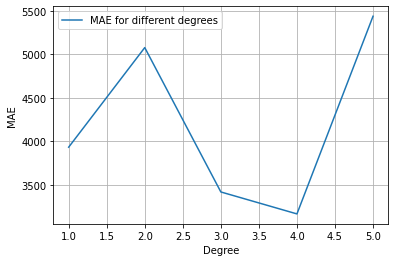

In [39]:
import matplotlib.pyplot as plt

print(error)
plt.plot( range(1 , 6 ) , error[:5] , label = 'MAE for different degrees')
plt.xlabel("Degree")
plt.ylabel("MAE")
plt.legend()
plt.grid()
plt.show()

Applying cross-validation to see if degree 4 is actually the best.


In [40]:
from sklearn.model_selection import cross_val_score
error = []


for degree in range(1, 7) :
  polynomial_features = PolynomialFeatures(degree= degree )
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                          ("linear_regression", linear_regression)])

  error.append(np.mean(abs((cross_val_score(pipeline, X_train, y_train, cv = 3)))))

print(f'The minimum error is {min(error)}, and we get it using degree {np.argmin(error)+1}')


The minimum error is 0.617291646025977, and we get it using degree 4


From the graph we can see that the best degree is 4.

[0.7325930056932645, 0.7779216553462573, 0.7808574516519048, 0.617291646025977, 68502.81811972165, 125247.98691027577]


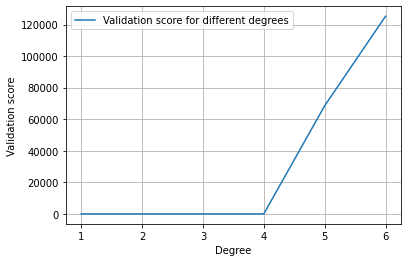

In [41]:
print(error)
plt.plot( range(1 , 7 ) , error , label = 'Validation score for different degrees')
plt.xlabel("Degree")
plt.ylabel("Validation score")
plt.legend()
plt.grid()
plt.show()

Applying regularization to see if it makes a model better. It is seen from the error that regularization is redundant since the regularization error is greater from the previous error calculated using polynomial features.

In [42]:
from sklearn.linear_model import Ridge
error = []
ridge = Ridge(normalize= True)
alphas = [i/10 for i in range(2, 32, 2)]
for alpha in alphas:
  ridge.set_params(alpha = alpha)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)
  error.append(mean_absolute_error(y_test, y_pred))


print(f'the minimum error is {min(error)}, and we get it using alpha {alphas[np.argmin(error)]}')


the minimum error is 4182.7245089046855, and we get it using alpha 0.2
